In [1]:
%matplotlib inline
import sys
import os
import logging
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')
logger = logging.getLogger()

# Add project root to Python path
project_root = Path().resolve()
sys.path.append(str(project_root))

# Import your modules
from src.data_loader.data_loader import DataLoader
from src.data_loader.augmentation import SnakeAugmentor

logger.info(f"Project root: {project_root}")
logger.info(f"Python path: {sys.path}")

INFO: NumExpr defaulting to 16 threads.
INFO: Project root: D:\AMM_HW\cv-amm-hw
INFO: Python path: ['d:\\AMM_HW\\cv-amm-hw\\.conda\\python310.zip', 'd:\\AMM_HW\\cv-amm-hw\\.conda\\DLLs', 'd:\\AMM_HW\\cv-amm-hw\\.conda\\lib', 'd:\\AMM_HW\\cv-amm-hw\\.conda', '', 'd:\\AMM_HW\\cv-amm-hw\\.conda\\lib\\site-packages', 'd:\\AMM_HW\\cv-amm-hw\\.conda\\lib\\site-packages\\win32', 'd:\\AMM_HW\\cv-amm-hw\\.conda\\lib\\site-packages\\win32\\lib', 'd:\\AMM_HW\\cv-amm-hw\\.conda\\lib\\site-packages\\Pythonwin', 'D:\\AMM_HW\\cv-amm-hw', 'd:\\AMM_HW\\cv-amm-hw', 'd:\\AMM_HW\\cv-amm-hw']


In [2]:
img_path = "data/train_images_small"
label_path = "data/venomous_status_metadata.csv"
meta_data_path = "data/train_images_metadata.csv"

data_loader = DataLoader(
    image_data_set_path=img_path,
    meta_data_path=meta_data_path,
    label_info_path=label_path,
    num_images=1000
    )

INFO: Initializing DataLoader...
INFO: Checking paths...
INFO: Loading metadata from data/train_images_metadata.csv...
INFO: Loading label info from data/venomous_status_metadata.csv...
INFO: Loading image data from data/train_images_small...
Loading images: 100%|██████████| 1000/1000 [00:00<00:00, 1032.53it/s]


In [6]:
train_samples = data_loader.get_training_set()
logger.info(f"✅ Loaded {len(train_samples)} samples")

# Get first 3 non-corrupted samples
valid_samples = []
for sample in train_samples:
    if sample.image is not None and sample.image.size > 0:
        valid_samples.append(sample)
    if len(valid_samples) >= 3:
        break

logger.info(f"Found {len(valid_samples)} valid samples for testing")

INFO: ✅ Loaded 800 samples
INFO: Found 3 valid samples for testing


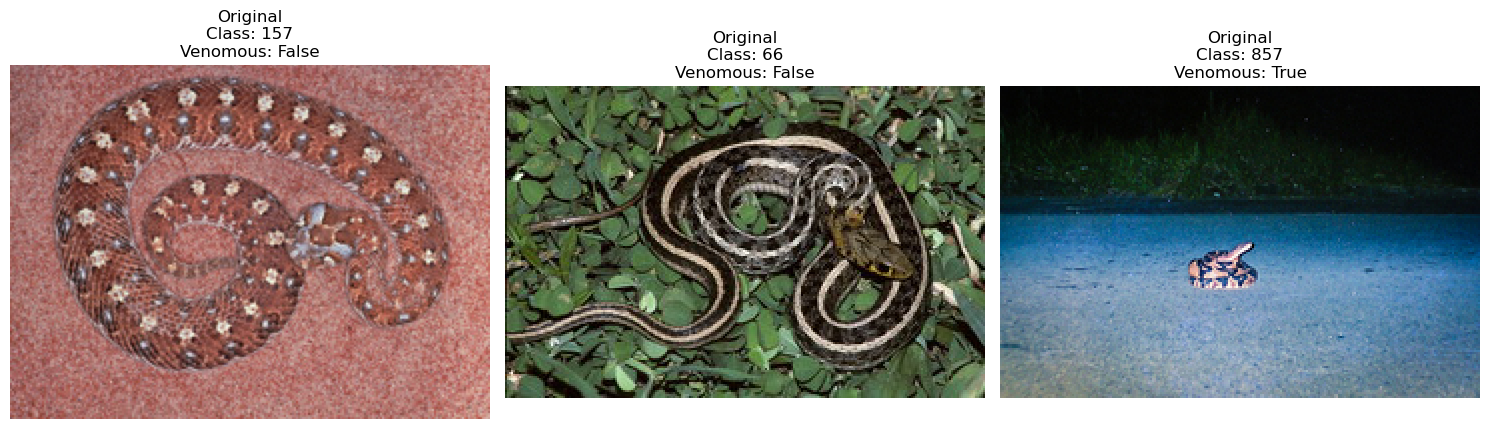

In [7]:
# Display original images
plt.figure(figsize=(15, 5))
for i, sample in enumerate(valid_samples):
    plt.subplot(1, 3, i+1)
    plt.imshow(sample.image)
    plt.title(f"Original\nClass: {sample.original_class}\nVenomous: {sample.original_venomous}")
    plt.axis('off')
plt.tight_layout()
plt.show()

INFO: ✅ Mild augmentation successful
INFO: ✅ Medium augmentation successful
INFO: ✅ Strong augmentation successful


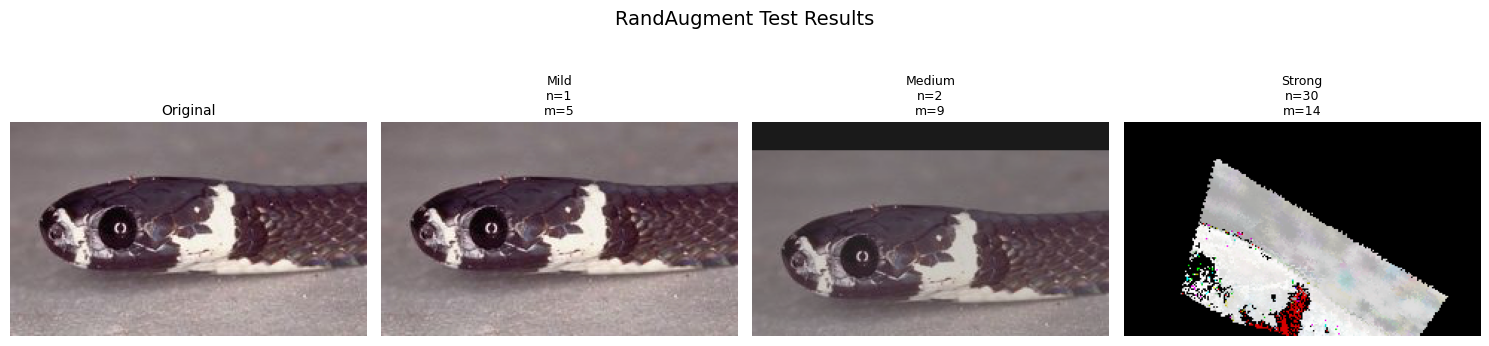

In [26]:
# Test different augmentation levels
augmentation_configs = [
    {"name": "Mild", "params": {"n_transforms": 1, "magnitude": 5}},
    {"name": "Medium", "params": {"n_transforms": 2, "magnitude": 9}},
    {"name": "Strong", "params": {"n_transforms": 30, "magnitude": 14}}
]

# Display augmentations for first sample
sample = train_samples[50]
plt.figure(figsize=(15, 4))

# Original
plt.subplot(1, 4, 1)
plt.imshow(sample.image)
plt.title("Original", fontsize=10)
plt.axis('off')

# Augmentations
for idx, config in enumerate(augmentation_configs, start=2):
    try:
        augmented = SnakeAugmentor.randaugment(
            image=sample.image.copy(),
            **config["params"]
        )
        plt.subplot(1, 4, idx)
        plt.imshow(augmented)
        plt.title(f"{config['name']}\nn={config['params']['n_transforms']}\nm={config['params']['magnitude']}", 
                 fontsize=9)
        plt.axis('off')
        logger.info(f"✅ {config['name']} augmentation successful")
    except Exception as e:
        logger.error(f"❌ {config['name']} augmentation failed: {str(e)}")
        # Show error placeholder
        plt.subplot(1, 4, idx)
        plt.imshow(np.ones((224, 224, 3)) * 0.9)
        plt.title(f"ERROR\n{config['name']}", color='red', fontsize=9)
        plt.axis('off')

plt.tight_layout()
plt.suptitle("RandAugment Test Results", y=1.05, fontsize=14)
plt.show()